In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [2]:
import networkx as nx

from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

# Prepare Data
G = nx.karate_club_graph()

SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
edge_attrs = {}

for start_node, end_node, _ in G.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["club"] == G.nodes[end_node]["club"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(G, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(width=400, height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("club", "@club")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

In [3]:
import urllib.request
import json
import re
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import nltk
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from matplotlib import pyplot as plt
import requests
# import stats
import os
import powerlaw

# from fa2 import ForceAtlas2
from nltk.tokenize import WordPunctTokenizer

sns.set_style("whitegrid", { 
    'axes.labelcolor': '1',
     'figure.facecolor': '1',
     'text.color': '1',
     'xtick.color': '1',
     'ytick.color': '1'})

%matplotlib inline  

In [4]:
baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
title = "List_of_Aesthetics"
content = "prop=revisions&rvprop=content&rvslots=*" 
dataformat = "format=json" 

query = baseurl+action+"&"+content+"&titles="+title+"&"+dataformat
print(query)
    
response = urllib.request.urlopen(query)
data = response.read()
cont = data.decode('utf-8')

jsontext = json.loads(cont)

https://aesthetics.fandom.com/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=List_of_Aesthetics&format=json


In [5]:
en_pag=re.findall(r'\d+',str(jsontext['query']['pages'].keys()))

txt_new=jsontext['query']['pages'][str(en_pag[0])]['revisions'][0]['slots']['main']['*']

In [6]:
pattern="(?:\[\[(.*?)\]\])"

alph_txt=re.split('(?:\=\=A\=\=)', txt_new)

In [7]:
alph_list=re.findall(pattern, alph_txt[1])

In [8]:
alph_list

['Abstract',
 'Abstract Tech',
 'Acid Pixie',
 'Acidwave',
 'Adventurecore',
 'Afrofuturism',
 'Afro-Victorian',
 'After Hours',
 'Agrogirl/Agroboy|Agropeople',
 'Alien',
 'Alternative',
 'Americana',
 'American Pioneers',
 'American Revolution',
 'Androgynous',
 'Anemoiacore',
 'Angelcore',
 'Anglocore',
 'Anglo Gothic',
 'Angura Kei',
 'Animecore',
 'Anti-Fashion',
 'Applecore',
 'Art Academia',
 'Arts and Crafts Movement|Arts and Crafts',
 'Art Deco',
 'Art Hoe',
 'Art Nouveau',
 'Artistiekelingen',
 'Athlete',
 'Atompunk',
 'Auroracore',
 'Autumn',
 'Avant-garde',
 'Babycore',
 'Babygirl',
 'Barbiecore',
 'Bardcore',
 'Baddie',
 'Ballet Academia',
 'Baroque',
 'Bastardcore',
 'Beatnik',
 'Bibliopunk',
 'Biker',
 'Bills',
 'Bimbo Casual',
 'Biopunk',
 'Bizarro Fiction',
 'Blob Web',
 'Bookstore Girl',
 'Bloomcore',
 'Bodikon',
 'Bogan',
 'Bohemian',
 'Bombacore',
 'Bosozoku',
 'Boujee',
 'Breakcore',
 'Brocore',
 'Bronzepunk',
 'Britpop',
 'Bubble Goth',
 'Bubblegum Bitch',
 'Bubble

In [9]:
print("|" in "Agrogirl/Agroboy|Agropeople")

True


In [10]:
DG = nx.DiGraph()

for i in alph_list:
    if "|" in i:
        spl=re.split('(?:\|)', i)
        alph_list[alph_list.index(i)]=spl[1]
        DG.add_node(spl[1])    
    else:
        DG.add_node(i)

In [11]:
len(alph_list)

549

In [12]:
#len(DG.nodes())

In [13]:
mapping = {'Neo - Romanism':'Neo-Romanism', 'Robotics Kid':'Robotics Kids', 'Sad people':'Sadpeople'}
DG = nx.relabel_nodes(DG, mapping)

In [28]:
pd.DataFrame(list(DG.nodes())).to_csv('aesthetics.csv')

In [14]:
list(DG.nodes)

['Abstract',
 'Abstract Tech',
 'Acid Pixie',
 'Acidwave',
 'Adventurecore',
 'Afrofuturism',
 'Afro-Victorian',
 'After Hours',
 'Agropeople',
 'Alien',
 'Alternative',
 'Americana',
 'American Pioneers',
 'American Revolution',
 'Androgynous',
 'Anemoiacore',
 'Angelcore',
 'Anglocore',
 'Anglo Gothic',
 'Angura Kei',
 'Animecore',
 'Anti-Fashion',
 'Applecore',
 'Art Academia',
 'Arts and Crafts',
 'Art Deco',
 'Art Hoe',
 'Art Nouveau',
 'Artistiekelingen',
 'Athlete',
 'Atompunk',
 'Auroracore',
 'Autumn',
 'Avant-garde',
 'Babycore',
 'Babygirl',
 'Barbiecore',
 'Bardcore',
 'Baddie',
 'Ballet Academia',
 'Baroque',
 'Bastardcore',
 'Beatnik',
 'Bibliopunk',
 'Biker',
 'Bills',
 'Bimbo Casual',
 'Biopunk',
 'Bizarro Fiction',
 'Blob Web',
 'Bookstore Girl',
 'Bloomcore',
 'Bodikon',
 'Bogan',
 'Bohemian',
 'Bombacore',
 'Bosozoku',
 'Boujee',
 'Breakcore',
 'Brocore',
 'Bronzepunk',
 'Britpop',
 'Bubble Goth',
 'Bubblegum Bitch',
 'Bubblegum Witch',
 'Bunnycore',
 'Butterfly',
 '

In [11]:
for char in DG:
    address = 'https://aesthetics.fandom.com/api.php?'
    action="action=query"
    titles=f"titles={char}"
#     content="prop=extracts&exlimit=1&explaintext"
    content="prop=revisions&rvslots=*&rvprop=content"
    dataformat="format=json"
    query = '%s%s&%s&%s&%s' % (address, action, titles, content, dataformat)
    response = requests.get(query)
    content_char = response.text
    char_file = char.replace('/','_')
    with open('aesthetics/'+f'{char_file}.txt', 'w') as f:
        f.write(content_char)

In [15]:
loc={}
for char in DG:
    char_file = char.replace('/','_')
    with open('aesthetics/'+f'{char_file}.txt', 'r') as f:
        a = f.read()
        loc[char] = {'loc':len(re.findall(r'\w+', a))}


In [16]:
len(loc)

549

In [17]:
loc

{'Abstract': {'loc': 553},
 'Abstract Tech': {'loc': 761},
 'Acid Pixie': {'loc': 599},
 'Acidwave': {'loc': 432},
 'Adventurecore': {'loc': 1750},
 'Afrofuturism': {'loc': 982},
 'Afro-Victorian': {'loc': 981},
 'After Hours': {'loc': 688},
 'Agropeople': {'loc': 530},
 'Alien': {'loc': 396},
 'Alternative': {'loc': 2029},
 'Americana': {'loc': 2793},
 'American Pioneers': {'loc': 1373},
 'American Revolution': {'loc': 207},
 'Androgynous': {'loc': 391},
 'Anemoiacore': {'loc': 1029},
 'Angelcore': {'loc': 1983},
 'Anglocore': {'loc': 346},
 'Anglo Gothic': {'loc': 604},
 'Angura Kei': {'loc': 342},
 'Animecore': {'loc': 1217},
 'Anti-Fashion': {'loc': 401},
 'Applecore': {'loc': 320},
 'Art Academia': {'loc': 974},
 'Arts and Crafts': {'loc': 11},
 'Art Deco': {'loc': 965},
 'Art Hoe': {'loc': 998},
 'Art Nouveau': {'loc': 364},
 'Artistiekelingen': {'loc': 204},
 'Athlete': {'loc': 697},
 'Atompunk': {'loc': 897},
 'Auroracore': {'loc': 1018},
 'Autumn': {'loc': 529},
 'Avant-garde'

In [18]:
sum([loc[d] for d in loc])/len(loc)

TypeError: unsupported operand type(s) for +: 'int' and 'dict'

In [19]:
"Sadpeople" in DG

True

In [20]:
##re.split('}}', content_char)[0]
egdes={}
for char in DG:
    char_file = char.replace('/','_')
    with open('aesthetics/'+f'{char_file}.txt', 'r') as f:
        a = f.read().replace('\n', '')
        pol = list(set(re.findall(r'\[\[([\w\s]*).*?\]\]', a)))
    table = str(re.findall(r'(?<=\{\{).*?(?=\}\})', a))

    
    connections = [x for x in list(set(re.findall(r'(?<=\[\[).*?(?=\]\])', table))) if x in DG]
    
    for c in connections:
        DG.add_edge(char, c )

In [21]:
len(DG.edges())

3293

In [22]:
# Defining node colors and edge colors
d = dict(DG.degree)
#mapping = {"Enemy": '#D22B2B', "Boss": '#FFD700', "Ally": '#63D1F4'}
colors = ["Green"]
edge_colors = ['Blue']

In [23]:
!pip install NetworkxD3

ERROR: Could not find a version that satisfies the requirement NetworkxD3
ERROR: No matching distribution found for NetworkxD3


In [25]:
import jaal

C:\Users\Gabo\anaconda3\lib\site-packages\dash_bootstrap_components\_table.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [26]:
UGCC.nodes['Abstract']['loc']

NameError: name 'UGCC' is not defined

In [118]:
nx.set_node_attributes(UGCC, loc)

In [141]:
G.nodes[start_node]['index']

KeyError: 'index'

In [153]:
loc

{'Abstract': {'loc': 553},
 'Abstract Tech': {'loc': 761},
 'Acid Pixie': {'loc': 599},
 'Acidwave': {'loc': 432},
 'Adventurecore': {'loc': 1750},
 'Afrofuturism': {'loc': 982},
 'Afro-Victorian': {'loc': 981},
 'After Hours': {'loc': 688},
 'Agropeople': {'loc': 530},
 'Alien': {'loc': 396},
 'Alternative': {'loc': 2029},
 'Americana': {'loc': 2793},
 'American Pioneers': {'loc': 1373},
 'American Revolution': {'loc': 207},
 'Androgynous': {'loc': 391},
 'Anemoiacore': {'loc': 1029},
 'Angelcore': {'loc': 1983},
 'Anglocore': {'loc': 346},
 'Anglo Gothic': {'loc': 604},
 'Angura Kei': {'loc': 342},
 'Animecore': {'loc': 1217},
 'Anti-Fashion': {'loc': 401},
 'Applecore': {'loc': 320},
 'Art Academia': {'loc': 974},
 'Arts and Crafts': {'loc': 11},
 'Art Deco': {'loc': 965},
 'Art Hoe': {'loc': 998},
 'Art Nouveau': {'loc': 364},
 'Artistiekelingen': {'loc': 204},
 'Athlete': {'loc': 697},
 'Atompunk': {'loc': 897},
 'Auroracore': {'loc': 1018},
 'Autumn': {'loc': 529},
 'Avant-garde'

In [154]:
for char in d.keys():
    d[char] = {'deg':d[char]}

In [155]:
d

{'Abstract': {'deg': 14},
 'Abstract Tech': {'deg': 10},
 'Acid Pixie': {'deg': 10},
 'Acidwave': {'deg': 11},
 'Adventurecore': {'deg': 30},
 'Afrofuturism': {'deg': 8},
 'Afro-Victorian': {'deg': 0},
 'After Hours': {'deg': 29},
 'Agropeople': {'deg': 2},
 'Alien': {'deg': 13},
 'Alternative': {'deg': 10},
 'Americana': {'deg': 34},
 'American Pioneers': {'deg': 7},
 'American Revolution': {'deg': 3},
 'Androgynous': {'deg': 9},
 'Anemoiacore': {'deg': 7},
 'Angelcore': {'deg': 27},
 'Anglocore': {'deg': 0},
 'Anglo Gothic': {'deg': 10},
 'Angura Kei': {'deg': 5},
 'Animecore': {'deg': 38},
 'Anti-Fashion': {'deg': 5},
 'Applecore': {'deg': 5},
 'Art Academia': {'deg': 50},
 'Arts and Crafts': {'deg': 0},
 'Art Deco': {'deg': 13},
 'Art Hoe': {'deg': 24},
 'Art Nouveau': {'deg': 6},
 'Artistiekelingen': {'deg': 3},
 'Athlete': {'deg': 5},
 'Atompunk': {'deg': 17},
 'Auroracore': {'deg': 14},
 'Autumn': {'deg': 14},
 'Avant-garde': {'deg': 16},
 'Babycore': {'deg': 16},
 'Babygirl': {

In [156]:
import networkx as nx

from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool, WheelZoomTool, PanTool, TapTool , MultiLine, NodesAndLinkedEdges, EdgesAndLinkedNodes)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

# Prepare Data
G = UGCC

SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
# sizes = [v*5 for v in list(d.values())]

edge_attrs = {}

for start_node, end_node, _ in G.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["loc"] > G.nodes[end_node]["loc"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(G, edge_attrs, "edge_color")
nx.set_node_attributes(G, d)

# Show with Bokeh
plot = Plot(width=900, height=900,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("loc", "@loc")])
plot.add_tools(node_hover_tool, PanTool(), WheelZoomTool(), ResetTool(), TapTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size="deg", fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size="deg", fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size="deg", fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
# graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

In [126]:
# Using force atlas configuration to achieve a pretty graph
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=40,

                        # Log
                        verbose=True)

plt.figure(figsize=(18,18)) 
positions = forceatlas2.forceatlas2_networkx_layout(DG, pos=None, iterations=2000)
nx.draw_networkx_nodes(DG, positions, node_size=[v*5 for v in list(d.values())], node_color=colors, alpha=0.8)
nx.draw_networkx_edges(DG, positions, edge_color=edge_colors, alpha=0.5)
plt.axis('off')
plt.show()

NameError: name 'ForceAtlas2' is not defined

In [84]:
UG = DG.to_undirected()
d2 = dict(UG.degree)

100%|██████████| 2000/2000 [00:10<00:00, 181.95it/s]


BarnesHut Approximation  took  2.00  seconds
Repulsion forces  took  8.24  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  0.19  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


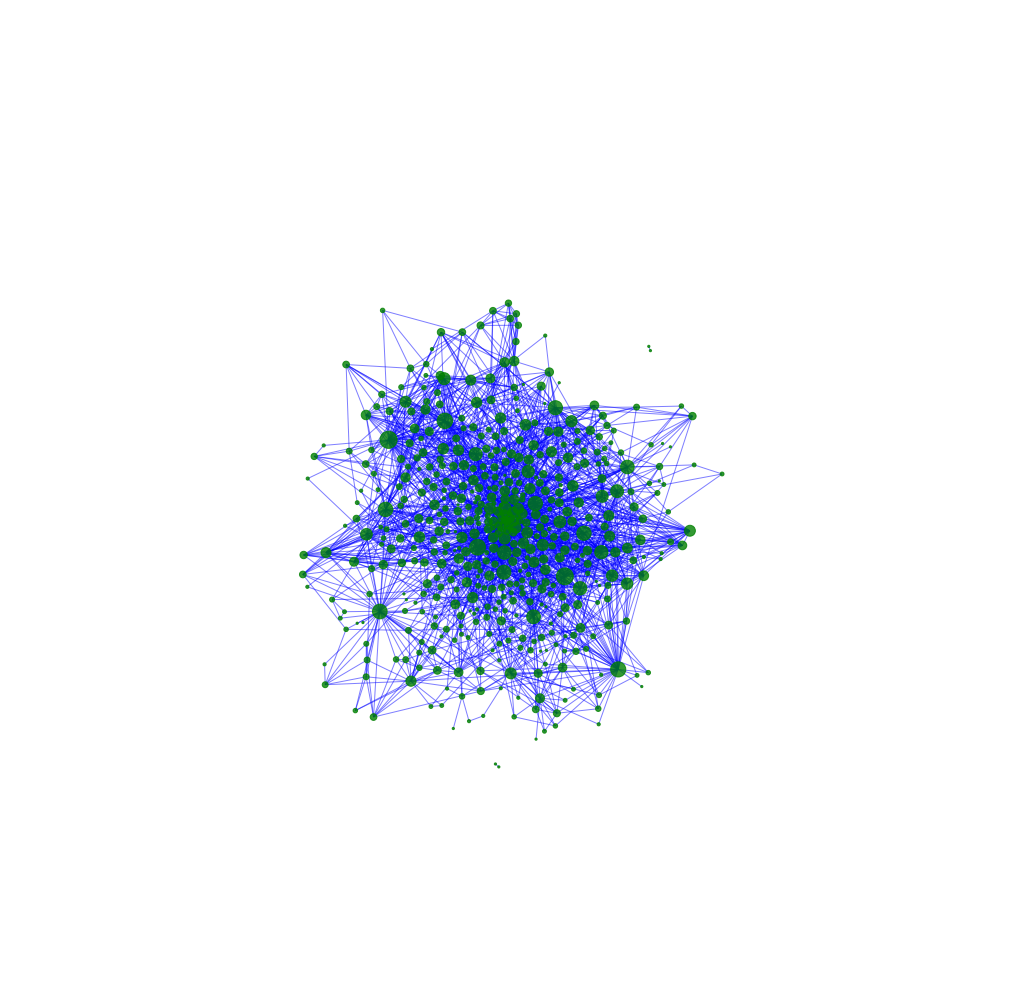

In [138]:
# Using force atlas configuration to achieve a pretty graph
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=40,

                        # Log
                        verbose=True)

plt.figure(figsize=(18,18)) 
positions = forceatlas2.forceatlas2_networkx_layout(UG, pos=None, iterations=2000)
nx.draw_networkx_nodes(UG, positions, node_size=[v*5 for v in list(d2.values())], node_color=colors, alpha=0.8)
nx.draw_networkx_edges(UG, positions, edge_color=edge_colors, alpha=0.5)
plt.axis('off')
plt.show()

In [85]:
len(UG.edges())

2542

In [26]:
# Top 5 most connected aesthetics in terms of in degree
sorted([
    {'name':x, 'value':DG.in_degree(x)} 
    for x,y in DG.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Cottagecore', 'value': 56},
 {'name': 'Vaporwave', 'value': 55},
 {'name': 'Vintage', 'value': 47},
 {'name': 'Naturecore', 'value': 46},
 {'name': 'Cyberpunk', 'value': 42},
 {'name': 'Art Academia', 'value': 41},
 {'name': 'Dark Academia', 'value': 41},
 {'name': 'Pastel', 'value': 38},
 {'name': 'Kidcore', 'value': 37},
 {'name': 'Goth', 'value': 36},
 {'name': 'Grunge', 'value': 34},
 {'name': 'Synthwave', 'value': 33},
 {'name': 'Lo-Fi', 'value': 32},
 {'name': 'Glowwave', 'value': 30},
 {'name': 'Punk', 'value': 30},
 {'name': 'Animecore', 'value': 29},
 {'name': 'Witchcore', 'value': 28},
 {'name': 'Light Academia', 'value': 27},
 {'name': 'Baddie', 'value': 26},
 {'name': 'Goblincore', 'value': 25}]

In [27]:
# Top 5 most connected aesthetics in terms of out degree
sorted([
    {'name':x, 'value':DG.out_degree(x)} 
    for x,y in DG.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Milleniwave', 'value': 38},
 {'name': 'Cyberpunk', 'value': 33},
 {'name': 'Lo-Fi', 'value': 27},
 {'name': 'Cottagecore', 'value': 25},
 {'name': 'Witchcore', 'value': 25},
 {'name': 'Neo-Romanism', 'value': 24},
 {'name': 'Glowwave', 'value': 23},
 {'name': 'Rainbowcore', 'value': 21},
 {'name': 'Vaporwave', 'value': 21},
 {'name': 'Camp', 'value': 20},
 {'name': 'Dreamy', 'value': 20},
 {'name': 'Goth', 'value': 20},
 {'name': 'Modernism', 'value': 20},
 {'name': 'Grunge', 'value': 19},
 {'name': 'Nostalgiacore', 'value': 19},
 {'name': 'Bloomcore', 'value': 18},
 {'name': 'Dark Academia', 'value': 18},
 {'name': 'Cyberghetto', 'value': 17},
 {'name': 'Hot Topic', 'value': 17},
 {'name': 'Rainy Day', 'value': 17}]

In [86]:
# extraction of GCC and creation of the undirected version of the graph
largest_cc = max(nx.weakly_connected_components(DG), key=len)
DGCC = DG.subgraph(largest_cc)
UGCC = DGCC.to_undirected()

In [87]:
len(DGCC.nodes()), len(DGCC.edges())

(511, 3285)

In [88]:
len(UGCC.nodes()), len(UGCC.edges())

(511, 2540)

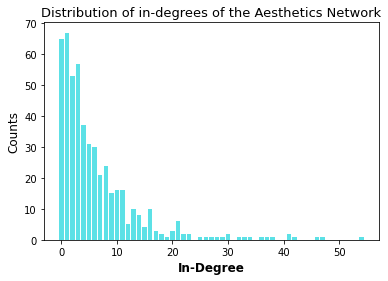

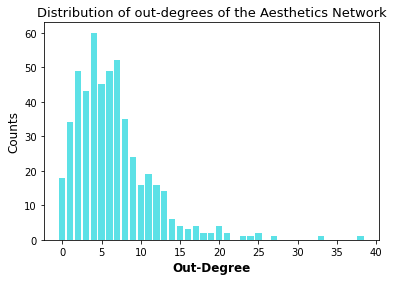

In [31]:
d_in=dict(DGCC.in_degree())
#Bar plot of the in-degree distribution
in_degrees=list(d_in.values())
v1 = np.arange(int(min(in_degrees)),int(max(in_degrees)))
count,bins=np.histogram(in_degrees,bins=v1)
plt.bar(bins[:-1], count,color='#5ce1e6')
plt.title('Distribution of in-degrees of the Aesthetics Network',fontsize=13)
plt.xlabel('In-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
plt.show() 

d_out=dict(DGCC.out_degree())
#Bar plot of the out-degree distribution
out_degrees=list(d_out.values())
v2 = np.arange(int(min(out_degrees)),int(max(out_degrees))+2)
count,bins=np.histogram(out_degrees,bins=v2)
plt.bar(bins[:-1], count,color='#5ce1e6')
plt.title('Distribution of out-degrees of the Aesthetics Network',fontsize=13)
plt.xlabel('Out-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
plt.show() 

# Graph analysis

## Basic stats

In [58]:
# extraction of GCC and creation of the undirected version of the graph
largest_cc = max(nx.weakly_connected_components(DG), key=len)
DGCC = DG.subgraph(largest_cc)
UGCC = DGCC.to_undirected()

### Number of nodes

In [34]:
len(DG.nodes)

546

In [59]:
len(DGCC.nodes)

508

In [63]:
DG.nodes-DGCC.nodes

{'Afro-Victorian',
 'Anglocore',
 'Arts and Crafts',
 'Bills',
 'Bombacore',
 'Comiccore',
 'Dungeon Synth',
 'Emancicore',
 'Ero guro',
 'Functionalism',
 'Gorean',
 'Grandmillenial',
 'Grindhouse',
 'Gull Girl',
 'Junkpunk',
 'La Sape',
 'Maidcore',
 'Malandragem',
 'Mindcore',
 'Onii Kei',
 'Pachuco',
 'Paninaro',
 'Post-rock',
 'Powwow Step',
 'Progressive Academia',
 'Salon Kei',
 'Sharpies',
 'Shā mǎ tè',
 'Skinheads',
 'Soulboys',
 'Spy fiction',
 'Stilyagi',
 'Swenkas',
 'Viking',
 'Waldorf',
 'Wandervogel',
 'Yankeecore',
 'Zazou'}

### Number of links



In [37]:
len(DG.edges)

3277

In [61]:
len(DGCC.edges)

3274

In [62]:
len(UGCC.edges)

2533

### Distributions of properties

In [64]:
nx.set_node_attributes(DGCC, loc)

In [65]:
DGCC.nodes.data()

NodeDataView({'Abstract': {'loc': 553}, 'Abstract Tech': {'loc': 761}, 'Acid Pixie': {'loc': 599}, 'Acidwave': {'loc': 432}, 'Adventurecore': {'loc': 1750}, 'Afrofuturism': {'loc': 982}, 'After Hours': {'loc': 676}, 'Agropeople': {'loc': 530}, 'Alien': {'loc': 396}, 'Alternative': {'loc': 2029}, 'Americana': {'loc': 2791}, 'American Pioneers': {'loc': 1373}, 'American Revolution': {'loc': 207}, 'Androgynous': {'loc': 391}, 'Anemoiacore': {'loc': 981}, 'Angelcore': {'loc': 1983}, 'Anglo Gothic': {'loc': 604}, 'Angura Kei': {'loc': 342}, 'Animecore': {'loc': 1245}, 'Anti-Fashion': {'loc': 401}, 'Applecore': {'loc': 320}, 'Art Academia': {'loc': 974}, 'Art Deco': {'loc': 965}, 'Art Hoe': {'loc': 998}, 'Art Nouveau': {'loc': 364}, 'Artistiekelingen': {'loc': 204}, 'Athlete': {'loc': 697}, 'Atompunk': {'loc': 889}, 'Auroracore': {'loc': 1008}, 'Autumn': {'loc': 529}, 'Avant-garde': {'loc': 361}, 'Babycore': {'loc': 733}, 'Babygirl': {'loc': 2018}, 'Barbiecore': {'loc': 1219}, 'Bardcore': {'

In [66]:
loc_list = [DGCC.nodes[node]['loc'] for node in DGCC.nodes]
np.mean(loc_list)

855.7106299212599

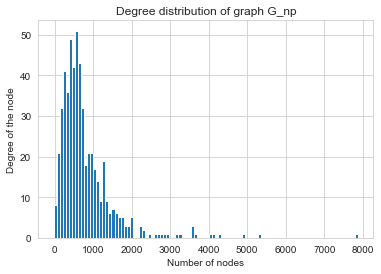

In [57]:
counts, edges = np.histogram(loc_list, bins = 100)
plt.bar(edges[:-1], counts, width=np.diff(edges))
plt.title("Degree distribution of graph G_np")
plt.xlabel('Number of nodes')
plt.ylabel('Degree of the node')
plt.show()

### Degree Distributions

C:\Users\bgran\AppData\Local\Temp/ipykernel_26920/2762125872.py:13: RuntimeWarning: divide by zero encountered in log
  axs[0, 1].scatter(np.log(edges[:-1]), np.log(counts))
C:\Users\bgran\AppData\Local\Temp/ipykernel_26920/2762125872.py:28: RuntimeWarning: divide by zero encountered in log
  axs[1, 1].scatter(np.log(edges[:-1]), np.log(counts))


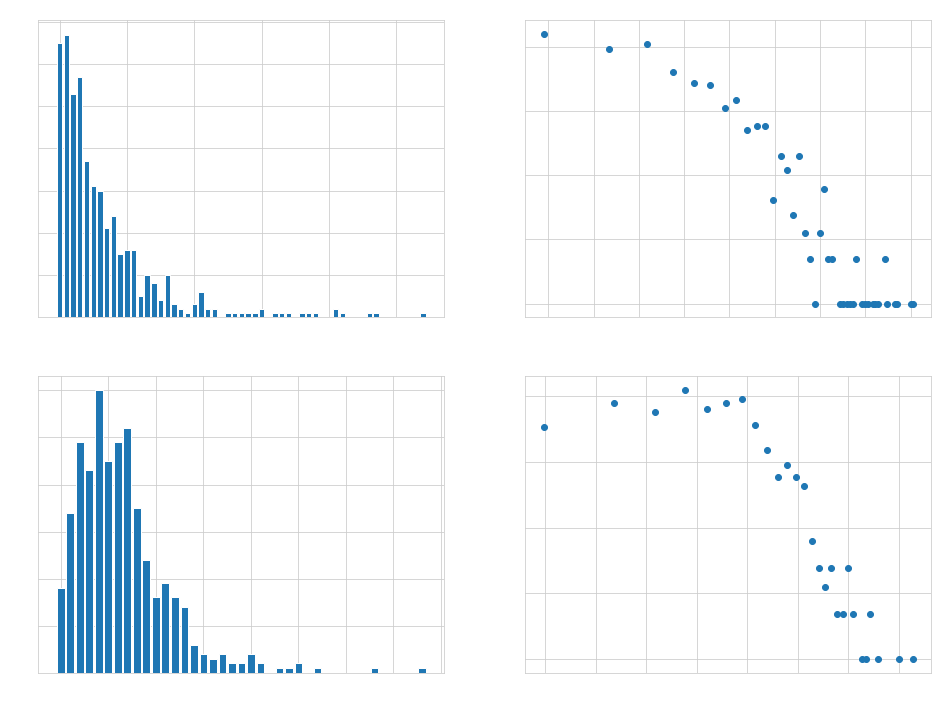

In [85]:
# directed in degrees
fig, axs = plt.subplots(2, 2, figsize = (16,12))

d_in=dict(DGCC.in_degree())
#Bar plot of the in-degree distribution
in_degrees=list(d_in.values())
v1 = np.arange(int(min(in_degrees)),int(max(in_degrees)))
count,bins=np.histogram(in_degrees,bins=v1)
axs[0, 0].bar(bins[:-1], count)
axs[0, 0].set_title('Distribution of in-degrees of the Aesthetics Network')

x = [val for (node, val) in DGCC.in_degree()]
counts, edges = np.histogram(x, bins = 1000)
axs[0, 1].scatter(np.log(edges[:-1]), np.log(counts))
axs[0, 1].set_title('Axis [1, 0]')


# directed out degrees
d_out=dict(DGCC.out_degree())
#Bar plot of the out-degree distribution
out_degrees=list(d_out.values())
v2 = np.arange(int(min(out_degrees)),int(max(out_degrees))+2)
count,bins=np.histogram(out_degrees,bins=v2)
axs[1, 0].bar(bins[:-1], count)
axs[1, 0].set_title('Distribution of out-degrees of the Aesthetics Network')

x = [val for (node, val) in DGCC.out_degree()]
counts, edges = np.histogram(x, bins = 1000)
axs[1, 1].scatter(np.log(edges[:-1]), np.log(counts))
axs[1, 1].set_title('Axis [1, 0]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')



C:\Users\bgran\AppData\Local\Temp/ipykernel_26920/1777366445.py:13: RuntimeWarning: divide by zero encountered in log
  axs[1].scatter(np.log(edges[:-1]), np.log(counts))


Text(0.5, 1.0, 'Axis [1, 0]')

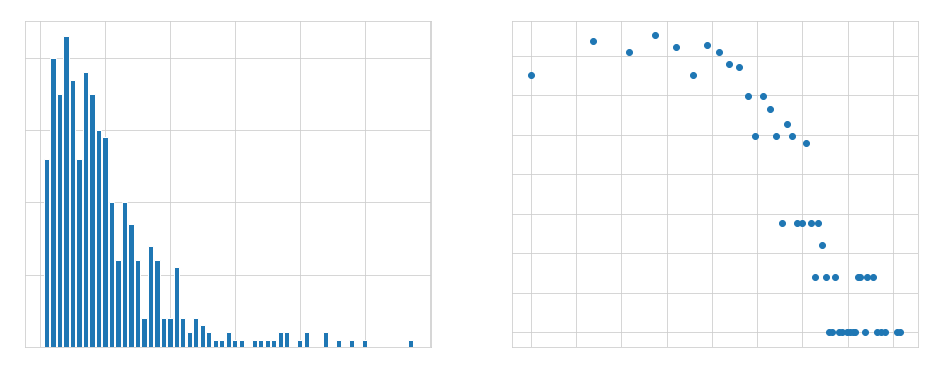

In [89]:
# undirected degrees
fig, axs = plt.subplots(1, 2, figsize = (16,6))

d_in=dict(UGCC.degree())
#Bar plot of the in-degree distribution
in_degrees=list(d_in.values())
v1 = np.arange(int(min(in_degrees)),int(max(in_degrees)))
count,bins=np.histogram(in_degrees,bins=v1)
axs[0].bar(bins[:-1], count)
axs[0].set_title('Distribution of in-degrees of the Aesthetics Network')

x = [val for (node, val) in UGCC.degree()]
counts, edges = np.histogram(x, bins = 1000)
axs[1].scatter(np.log(edges[:-1]), np.log(counts))
axs[1].set_title('Axis [1, 0]')


### Distributions stats

In [110]:
# in degrees
deg_list_all_in = [val for (node, val) in DGCC.in_degree()]
print(np.mean(deg_list_all_in))
print(np.median(deg_list_all_in))
print(stats.mode(deg_list_all_in))
print(np.min(deg_list_all_in))
print(np.max(deg_list_all_in))

6.44488188976378
4.0
1
0
56


In [111]:
# out degrees
deg_list_all_out = [val for (node, val) in DGCC.out_degree()]
print(np.mean(deg_list_all_out))
print(np.median(deg_list_all_out))
print(stats.mode(deg_list_all_out))
print(np.min(deg_list_all_out))
print(np.max(deg_list_all_out))

6.44488188976378
6.0
4
0
38


### Top connected nodes

In [90]:
# Top 5 most connected aesthetics in terms of in degree
sorted([
    {'name':x, 'value':DGCC.in_degree(x)} 
    for x,y in DGCC.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Cottagecore', 'value': 56},
 {'name': 'Vaporwave', 'value': 55},
 {'name': 'Vintage', 'value': 47},
 {'name': 'Naturecore', 'value': 46},
 {'name': 'Cyberpunk', 'value': 42},
 {'name': 'Art Academia', 'value': 41},
 {'name': 'Dark Academia', 'value': 41},
 {'name': 'Pastel', 'value': 38},
 {'name': 'Kidcore', 'value': 37},
 {'name': 'Goth', 'value': 36},
 {'name': 'Grunge', 'value': 34},
 {'name': 'Synthwave', 'value': 33},
 {'name': 'Lo-Fi', 'value': 32},
 {'name': 'Glowwave', 'value': 30},
 {'name': 'Punk', 'value': 30},
 {'name': 'Animecore', 'value': 29},
 {'name': 'Witchcore', 'value': 28},
 {'name': 'Light Academia', 'value': 27},
 {'name': 'Baddie', 'value': 26},
 {'name': 'Goblincore', 'value': 25}]

In [91]:
# Top 5 most connected aesthetics in terms of out degree
sorted([
    {'name':x, 'value':DGCC.out_degree(x)} 
    for x,y in DGCC.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Milleniwave', 'value': 38},
 {'name': 'Cyberpunk', 'value': 33},
 {'name': 'Lo-Fi', 'value': 27},
 {'name': 'Cottagecore', 'value': 25},
 {'name': 'Witchcore', 'value': 25},
 {'name': 'Neo-Romanism', 'value': 24},
 {'name': 'Glowwave', 'value': 23},
 {'name': 'Rainbowcore', 'value': 21},
 {'name': 'Vaporwave', 'value': 21},
 {'name': 'Camp', 'value': 20},
 {'name': 'Dreamy', 'value': 20},
 {'name': 'Goth', 'value': 20},
 {'name': 'Modernism', 'value': 20},
 {'name': 'Grunge', 'value': 19},
 {'name': 'Nostalgiacore', 'value': 19},
 {'name': 'Bloomcore', 'value': 18},
 {'name': 'Dark Academia', 'value': 18},
 {'name': 'Cyberghetto', 'value': 17},
 {'name': 'Hot Topic', 'value': 17},
 {'name': 'Rainy Day', 'value': 17}]

In [92]:
# Top 5 most connected aesthetics undirected representation
sorted([
    {'name':x, 'value':UGCC.degree(x)} 
    for x,y in UGCC.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Cottagecore', 'value': 59},
 {'name': 'Vaporwave', 'value': 57},
 {'name': 'Vintage', 'value': 50},
 {'name': 'Naturecore', 'value': 48},
 {'name': 'Cyberpunk', 'value': 46},
 {'name': 'Art Academia', 'value': 44},
 {'name': 'Dark Academia', 'value': 44},
 {'name': 'Lo-Fi', 'value': 41},
 {'name': 'Milleniwave', 'value': 41},
 {'name': 'Pastel', 'value': 40},
 {'name': 'Goth', 'value': 38},
 {'name': 'Punk', 'value': 38},
 {'name': 'Grunge', 'value': 37},
 {'name': 'Kidcore', 'value': 37},
 {'name': 'Synthwave', 'value': 36},
 {'name': 'Glowwave', 'value': 35},
 {'name': 'Witchcore', 'value': 34},
 {'name': 'Rainbowcore', 'value': 33},
 {'name': 'Dreamy', 'value': 31},
 {'name': 'Baddie', 'value': 30}]

In [93]:
sorted([{'name':x, 'value':DGCC.out_degree(x)-DGCC.in_degree(x)} for x,y in DGCC.nodes(data=True)], key=lambda k: k['value'],reverse=True)[0:10]

[{'name': 'Milleniwave', 'value': 30},
 {'name': 'Neo-Romanism', 'value': 23},
 {'name': 'Camp', 'value': 19},
 {'name': 'Cyberghetto', 'value': 16},
 {'name': 'Auroracore', 'value': 14},
 {'name': 'Hot Topic', 'value': 14},
 {'name': 'Nerd', 'value': 13},
 {'name': 'Ghostcore', 'value': 10},
 {'name': 'Rainy Day', 'value': 10},
 {'name': 'Fairy Tale', 'value': 9}]

In [94]:
sorted([{'name':x, 'value':DGCC.in_degree(x)-DGCC.out_degree(x)} for x,y in DGCC.nodes(data=True)], key=lambda k: k['value'],reverse=True)[0:10]

[{'name': 'Naturecore', 'value': 35},
 {'name': 'Vaporwave', 'value': 34},
 {'name': 'Vintage', 'value': 33},
 {'name': 'Art Academia', 'value': 32},
 {'name': 'Cottagecore', 'value': 31},
 {'name': 'Kidcore', 'value': 24},
 {'name': 'Dark Academia', 'value': 23},
 {'name': 'Pastel', 'value': 23},
 {'name': 'Animecore', 'value': 20},
 {'name': 'Light Academia', 'value': 20}]

### Exponent of the degree distribution 

In [113]:
powerlaw.Fit(deg_list_all_in).alpha


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


3.050233937142813

In [114]:
powerlaw.Fit(deg_list_all_out).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


4.870819108375876

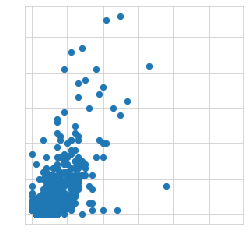

In [121]:
plt.scatter(deg_list_all_out, deg_list_all_in)
plt.axis('square')
plt.show()

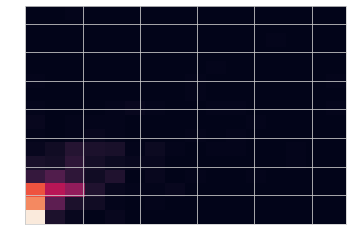

In [115]:
heatmap, xedges, yedges = np.histogram2d(deg_list_all_in, deg_list_all_out, bins=16)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

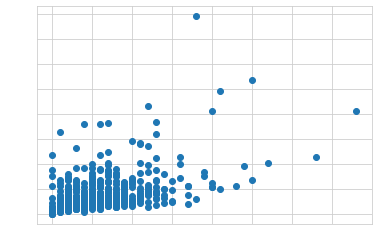

In [117]:
plt.scatter(deg_list_all_out, list(nx.get_node_attributes(DGCC, 'loc').values()))
plt.show()

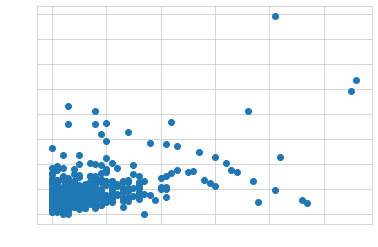

In [118]:
plt.scatter(deg_list_all_in, list(nx.get_node_attributes(DGCC, 'loc').values()))
plt.show()

### Nodes centrality

In [122]:
# degree centrality
sorted([{'name':x, 'value':y} for x,y in nx.degree_centrality(DGCC).items()], key=lambda k: k['value'],reverse=True)[0:5]

[{'name': 'Cottagecore', 'value': 0.15976331360946747},
 {'name': 'Vaporwave', 'value': 0.14990138067061146},
 {'name': 'Cyberpunk', 'value': 0.14792899408284024},
 {'name': 'Vintage', 'value': 0.1203155818540434},
 {'name': 'Dark Academia', 'value': 0.116370808678501}]

In [125]:
# degree centrality
sorted([{'name':x, 'value':y} for x,y in nx.in_degree_centrality(DGCC).items()], key=lambda k: k['value'],reverse=True)[0:5]

[{'name': 'Cottagecore', 'value': 0.11045364891518739},
 {'name': 'Vaporwave', 'value': 0.10848126232741617},
 {'name': 'Vintage', 'value': 0.09270216962524655},
 {'name': 'Naturecore', 'value': 0.09072978303747535},
 {'name': 'Cyberpunk', 'value': 0.08284023668639054}]

In [126]:
# degree centrality
sorted([{'name':x, 'value':y} for x,y in nx.out_degree_centrality(DGCC).items()], key=lambda k: k['value'],reverse=True)[0:5]

[{'name': 'Milleniwave', 'value': 0.07495069033530573},
 {'name': 'Cyberpunk', 'value': 0.0650887573964497},
 {'name': 'Lo-Fi', 'value': 0.05325443786982249},
 {'name': 'Cottagecore', 'value': 0.04930966469428008},
 {'name': 'Witchcore', 'value': 0.04930966469428008}]

In [123]:
# betweenness centrality
sorted([{'name':x, 'value':y} for x,y in nx.betweenness_centrality(DGCC).items()], key=lambda k: k['value'],reverse=True)[0:5]

[{'name': 'Cyberpunk', 'value': 0.07255572007121502},
 {'name': 'Cottagecore', 'value': 0.06094767916442742},
 {'name': 'Vintage', 'value': 0.0574569135896909},
 {'name': 'Goth', 'value': 0.05004624758206219},
 {'name': 'Grunge', 'value': 0.04505906911688491}]

In [124]:
# eigenvector centrality (how do do it separately for in and out edges)
sorted([{'name':x, 'value':y} for x,y in nx.eigenvector_centrality(DGCC).items()], key=lambda k: k['value'],reverse=True)[0:5]

[{'name': 'Vaporwave', 'value': 0.3242991953682048},
 {'name': 'Glowwave', 'value': 0.2610032794847355},
 {'name': 'Cyberpunk', 'value': 0.23659603911133634},
 {'name': 'Synthwave', 'value': 0.23081808493396566},
 {'name': 'Vintage', 'value': 0.23048080983447877}]

### PageRank node importance

In [142]:
ppr1 = nx.pagerank(DGCC)

In [144]:
sorted([{'name':x, 'value':y} for x,y in ppr1.items()], key=lambda k: k['value'],reverse=True)[0:5]

[{'name': 'Cottagecore', 'value': 0.015543618830890995},
 {'name': 'Dark Academia', 'value': 0.01403760726550105},
 {'name': 'Vaporwave', 'value': 0.013279172637377804},
 {'name': 'Vintage', 'value': 0.012817552761233898},
 {'name': 'Cyberpunk', 'value': 0.012621475672289684}]

### Assortativity

In [128]:
nx.degree_assortativity_coefficient(UGCC)

-0.10258619398637152

In [129]:
nx.attribute_assortativity_coefficient(UGCC, 'loc')


-0.003750709845959614

In [130]:
# by attribute TBD
# nx.attribute_assortativity_coefficient(UD, 'race')


### Shortest path analysis compared to random graph

In [131]:
nx.average_shortest_path_length(DGCC)


3.1300959791268697

In [132]:
nx.average_shortest_path_length(UGCC)

3.155228377517899

In [134]:
shortest_paths = list(nx.shortest_path_length(UGCC))
path_lengths_dg = []
for i in range(len(shortest_paths)):
    path_lengths_dg += list(shortest_paths[i][1].values())

In [135]:
N = len(UGCC.nodes)
k = sum([d for (n, d) in nx.degree(UGCC)]) / float(UGCC.number_of_nodes())
p = k/(N-1)
p

0.01966950876702542

In [136]:
GR = nx.erdos_renyi_graph(N, p)

In [137]:
shortest_paths = list(nx.shortest_path_length(GR))
path_lengths_gr = []
for i in range(len(shortest_paths)):
    path_lengths_gr += list(shortest_paths[i][1].values())

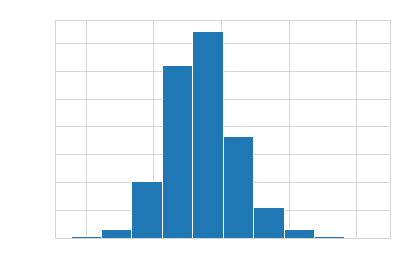

In [140]:
counts, edges = np.histogram(path_lengths_dg)
plt.bar(edges[:-1], counts, width=np.diff(edges))
plt.title("Shortest path length distribution of UGCC")
plt.xlabel('Number of nodes')
plt.ylabel('Degree of the node')
plt.show()

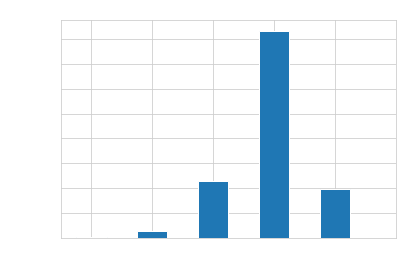

In [141]:
counts, edges = np.histogram(path_lengths_gr)
plt.bar(edges[:-1], counts, width=np.diff(edges))
plt.title("Shortest path length distribution of Erdos Renyi graph")
plt.xlabel('Number of nodes')
plt.ylabel('Degree of the node')
plt.show()

### Importance of a categorical proprty TBD